In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/american_soccer_analysis_mls_xgoals_teams_2025-07-10.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Team', 'Season', 'Games', 'ShtF', 'ShtA', 'GF', 'GA',
       'GD', 'xGF', 'xGA', 'xGD', 'GD-xGD', 'Pts', 'xPts'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0'],axis = 1)
xg_for = df['xGF']
xg_against = df['xGA']
timbers = df[df['Team']=='POR']

In [5]:
xg_for_avg = np.mean(xg_for)
xg_against_avg = np.mean(xg_against)

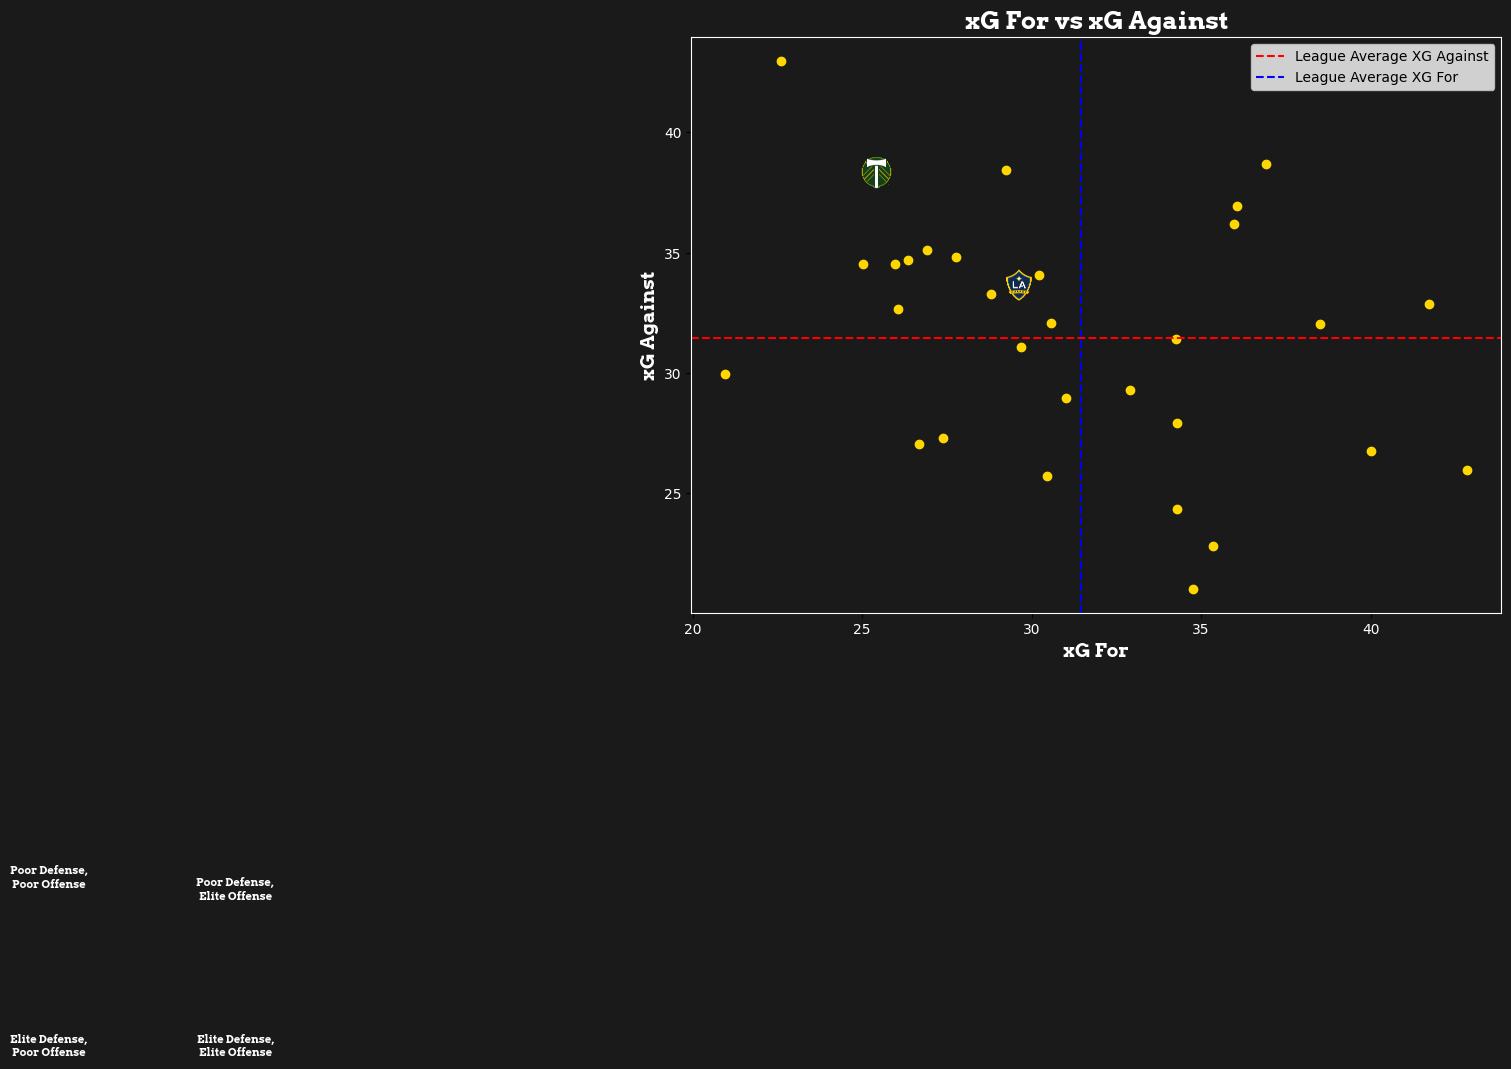

In [6]:
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# Load font
font_path = 'Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))  # Bigger canvas
fig.subplots_adjust(left=0.12, right=0.93, top=0.87, bottom=0.15)  # Adjust margins

# Set background
fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')

ax.set_xlim(min(xg_for)-1, max(xg_for)+1)
ax.set_ylim(min(xg_against)-1, max(xg_against)+1)

plt.hlines(xg_against_avg, xmin = np.min(xg_for) - 1, xmax = np.max(xg_for) + 1,colors='red', linestyles='dashed', label = 'League Average XG Against')
plt.vlines(xg_for_avg, ymin = np.min(xg_against) - 1, ymax = np.max(xg_against) + 1,colors='blue', linestyles='dashed', label = 'League Average XG For')
plt.scatter(xg_for,xg_against,color = 'gold')
plt.legend()
plt.xlabel('xG For',color = 'white',fontproperties = font_props,fontsize = 14)
plt.ylabel('xG Against',color = 'white',fontproperties = font_props,fontsize = 14)
plt.title('xG For vs xG Against',color = 'white',fontproperties = font_props,fontsize = 18)
# plt.text(timbers['xGF'] - 0.1,timbers['xGA'],'Portland\nTimbers',fontsize = 10,verticalalignment='bottom', horizontalalignment='right', color='white',fontproperties = font_props)

plt.text(1,1.5,'Elite Defense,\nPoor Offense',fontsize = 8,verticalalignment='bottom', horizontalalignment='center', color='white',fontproperties = font_props)
plt.text(1,8.5,'Poor Defense,\nPoor Offense',fontsize = 8,verticalalignment='bottom', horizontalalignment='center', color='white',fontproperties = font_props)
plt.text(6.5,8,'Poor Defense,\nElite Offense',fontsize = 8,verticalalignment='bottom', horizontalalignment='center', color='white',fontproperties = font_props)
plt.text(6.5,1.5,'Elite Defense,\nElite Offense',fontsize = 8,verticalalignment='bottom', horizontalalignment='center', color='white',fontproperties = font_props)

plt.yticks(color='white')
plt.xticks(color='white')


# Change axis colors to white
ax.spines['bottom'].set_color('white')  # Bottom border
ax.spines['top'].set_color('white')     # Top border
ax.spines['right'].set_color('white')   # Right border
ax.spines['left'].set_color('white')    # Left border

# 🔹 Add an image (e.g., team logo) to the plot
logo_path = "Data/Portland_Timbers_logo.png"  # Update with the correct path
logo = plt.imread(logo_path)

logo2_path = "Data/galaxy.png"
logo2 = plt.imread(logo2_path)

# Set position (adjust based on your needs)
newax = fig.add_axes([0.28,0.68, 0.04, 0.04], anchor='NE', zorder=1)
newax.imshow(logo)
newax.axis("off")  # Hide axes

# Set position (adjust based on your needs)
newax2 = fig.add_axes([0.42,0.54, 0.04, 0.04], anchor='NE', zorder=1)
newax2.imshow(logo2)
newax2.axis("off")  # Hide axes

plt.savefig('mls_timbers_xg_graph.png',dpi = 700)